In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

# Path to your folder containing CSV files
folder_path = '/content/drive/My Drive/data'

# List to store individual DataFrames
dataframes = []

# Loop through each file in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        # Read each CSV file into a DataFrame and append it to the list
        df = pd.read_csv(file_path, skiprows=2)
        dataframes.append(df)

# Concatenate all the DataFrames into one
data = pd.concat(dataframes, ignore_index=True)

# Display or manipulate final_dataframe
print(data)


        Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  \
0       2011      1    1     0       0          1.4             0   
1       2011      1    1     0      30          1.3             0   
2       2011      1    1     1       0          1.2             0   
3       2011      1    1     1      30          1.2             0   
4       2011      1    1     2       0          1.1             0   
...      ...    ...  ...   ...     ...          ...           ...   
437995  2017     12   31    21      30         -7.9            22   
437996  2017     12   31    22       0         -8.1             0   
437997  2017     12   31    22      30         -8.3             0   
437998  2017     12   31    23       0         -8.4             0   
437999  2017     12   31    23      30         -8.4             0   

        Clearsky DNI  Clearsky GHI  Cloud Type  ...  GHI  Relative Humidity  \
0                  0             0           0  ...    0              96.18   
1            

In [ ]:
# Keep only the specified columns
columns_to_keep = ['Day','Year','Month','Hour','Minute', 'Temperature', 'Dew Point', 'Wind Speed', 'Clearsky GHI','Cloud Type', 'Precipitable Water', 'Relative Humidity','Solar Zenith Angle','Pressure','GHI']
data = data[columns_to_keep]

In [ ]:
# Count NaN values in the entire DataFrame
data.isna().sum()


,0
Day,0
Year,0
Month,0
Hour,0
Minute,0
Temperature,0
Dew Point,0
Wind Speed,0
Clearsky GHI,0
Cloud Type,0


In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

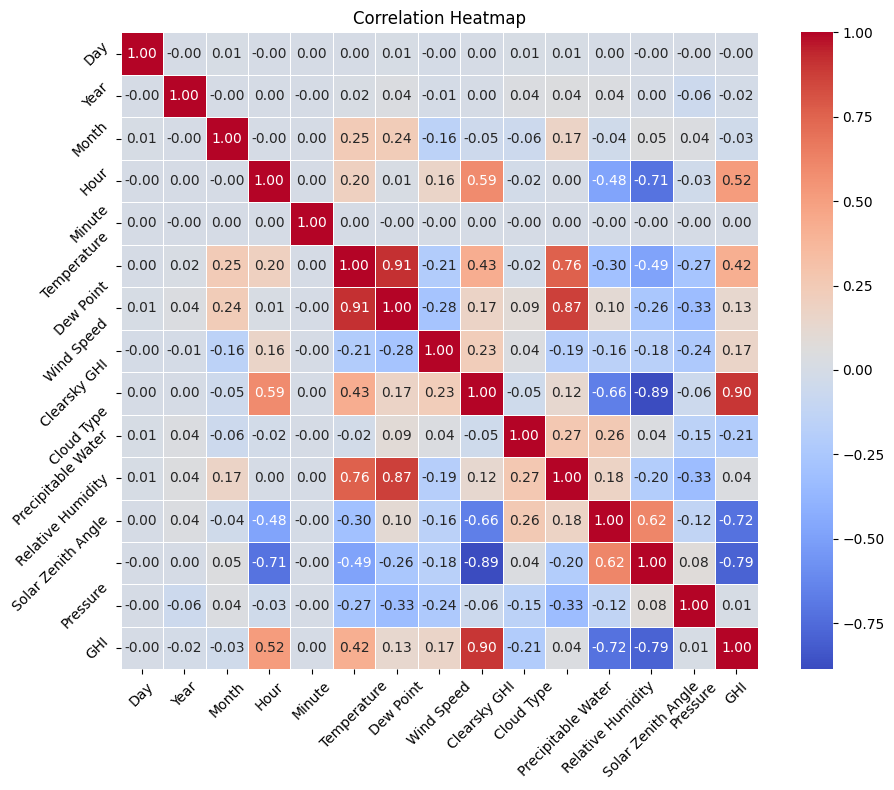

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=.5)

# Add titles and labels
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()  # Adjust the layout to make room for labels

# Show the heatmap
plt.show()


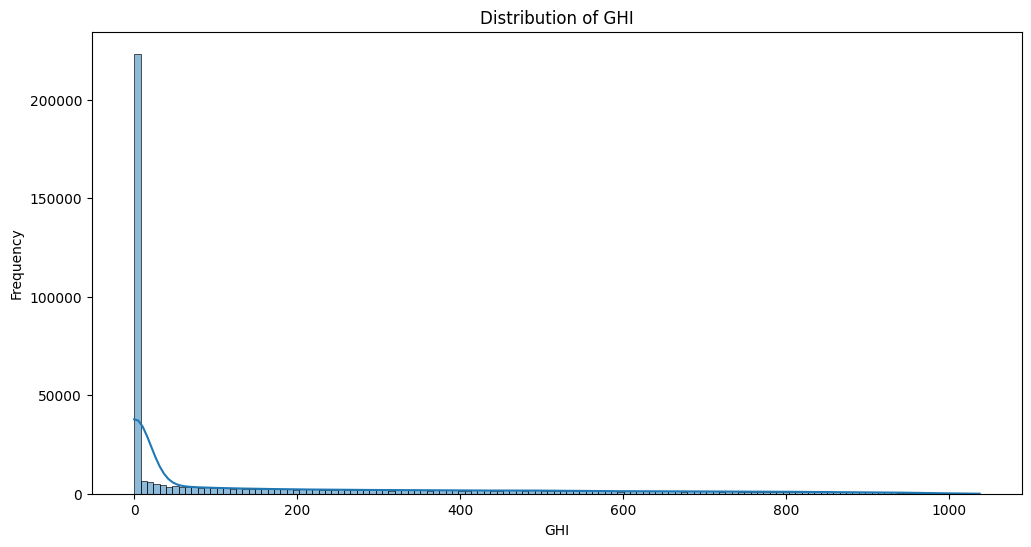

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data['GHI'], kde=True)
plt.title('Distribution of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
monthly_ghi_df = data.groupby(data['Month'])['GHI'].mean().reset_index()
monthly_ghi_df

,Month,GHI
0,1,87.691962
1,2,123.799851
2,3,169.067608
3,4,213.449472
4,5,237.829167
5,6,265.559417
6,7,265.561263
7,8,234.008414
8,9,189.769639
9,10,138.441613


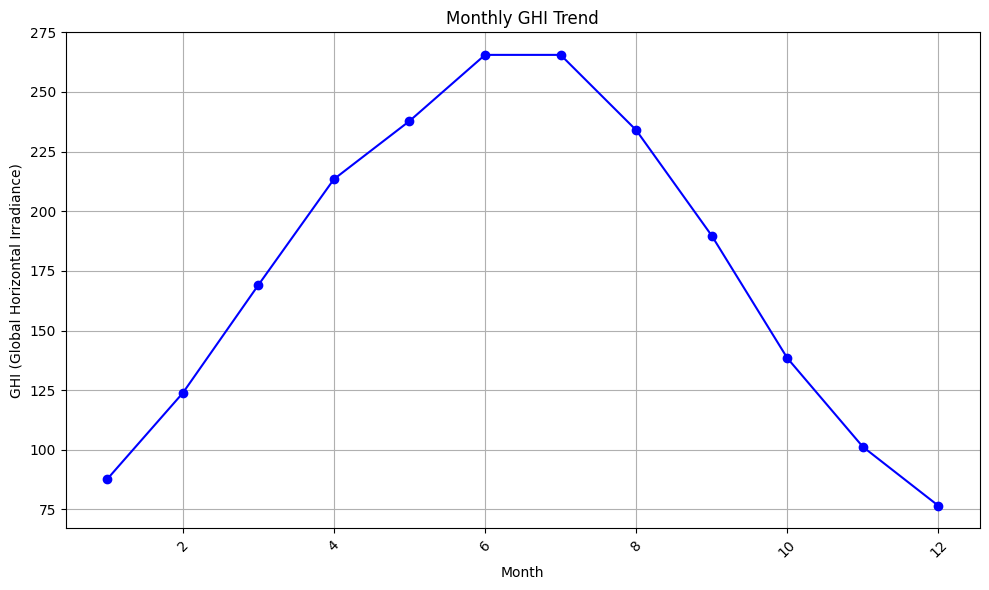

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Avg. GHI Generated per year
plt.figure(figsize=(10, 6))
plt.plot(monthly_ghi_df.Month, monthly_ghi_df.GHI, marker='o', linestyle='-', color='b')
plt.title('Monthly GHI Trend')
plt.xlabel('Month')
plt.ylabel('GHI (Global Horizontal Irradiance)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd



# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Created a new column 'Season' by applying the mapping function
data['Season'] = data['Month'].apply(get_season)

# Group by 'Season' and sum the GHI values
seasonal_ghi_df = data.groupby('Season')['GHI'].mean().reset_index()

# Display the result
print(seasonal_ghi_df)


   Season         GHI
0    Fall  143.098306
1  Spring  206.709611
2  Summer  254.928723
3  Winter   95.075824


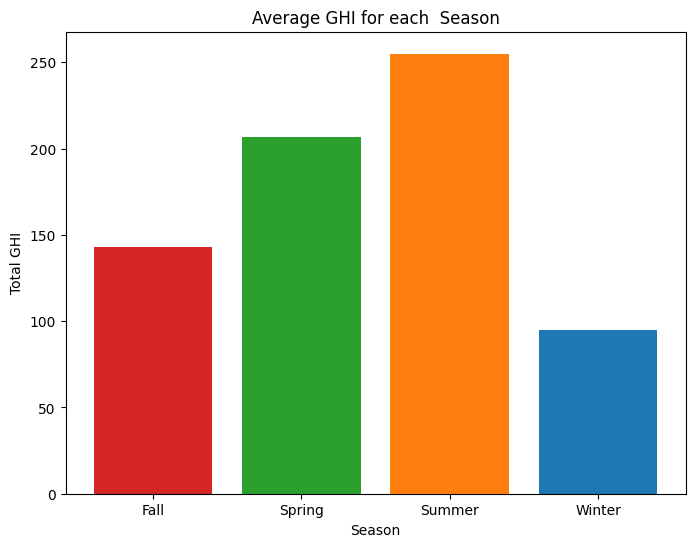

In [ ]:
import matplotlib.pyplot as plt

# Define colors for each season
season_colors = {
    'Winter': '#1f77b4',  # blue
    'Spring': '#2ca02c',  # green
    'Summer': '#ff7f0e',  # orange
    'Fall': '#d62728'     # red
}

# Total GHI per season
plt.figure(figsize=(8, 6))
plt.bar(seasonal_ghi_df['Season'], seasonal_ghi_df['GHI'],
        color=[season_colors[season] for season in seasonal_ghi_df['Season']])
plt.xlabel('Season')
plt.ylabel('Total GHI')
plt.title('Average GHI for each  Season')
plt.show()


In [ ]:
hourly_ghi_df = data.groupby(data['Hour'])['GHI'].mean().reset_index()
hourly_ghi_df

,Hour,GHI
0,0,3.543178
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,4,0.000000
5,5,0.000000
6,6,0.000000
7,7,0.000000
8,8,0.000000
9,9,0.000000


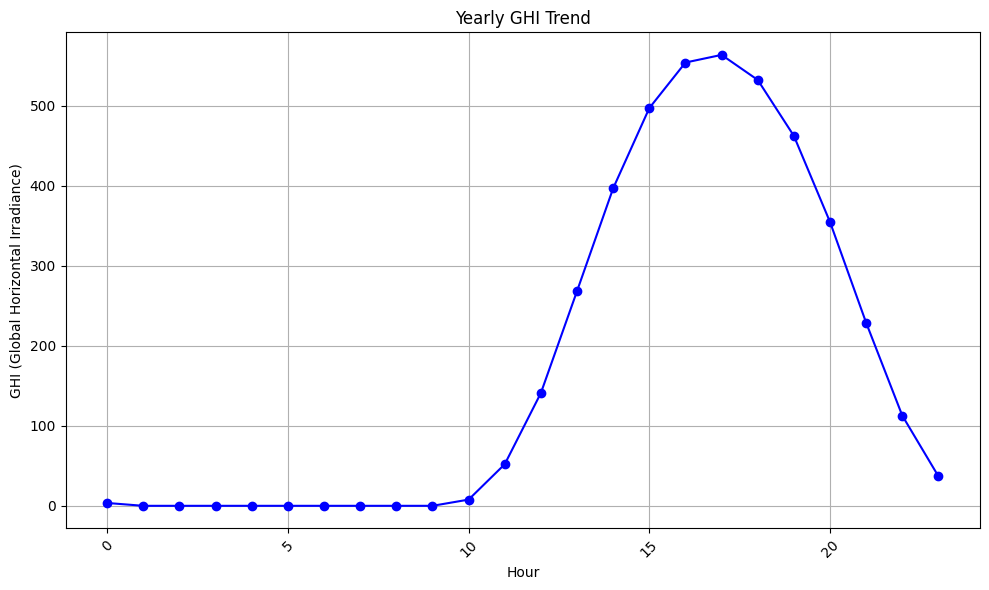

In [ ]:


# Avg. GHI Generated per hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_ghi_df.Hour, hourly_ghi_df.GHI, marker='o', linestyle='-', color='b')
plt.title('Yearly GHI Trend')
plt.xlabel('Hour')
plt.ylabel('GHI (Global Horizontal Irradiance)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
temp_ghi_df = data.groupby(data['Temperature'])['GHI'].mean().reset_index()
temp_ghi_df

,Temperature,GHI
0,-18.0,0.0
1,-17.8,0.0
2,-17.7,0.0
3,-17.6,0.0
4,-17.5,0.0
...,...,...
572,39.7,642.0
573,39.8,819.0
574,39.9,716.0
575,40.0,767.5


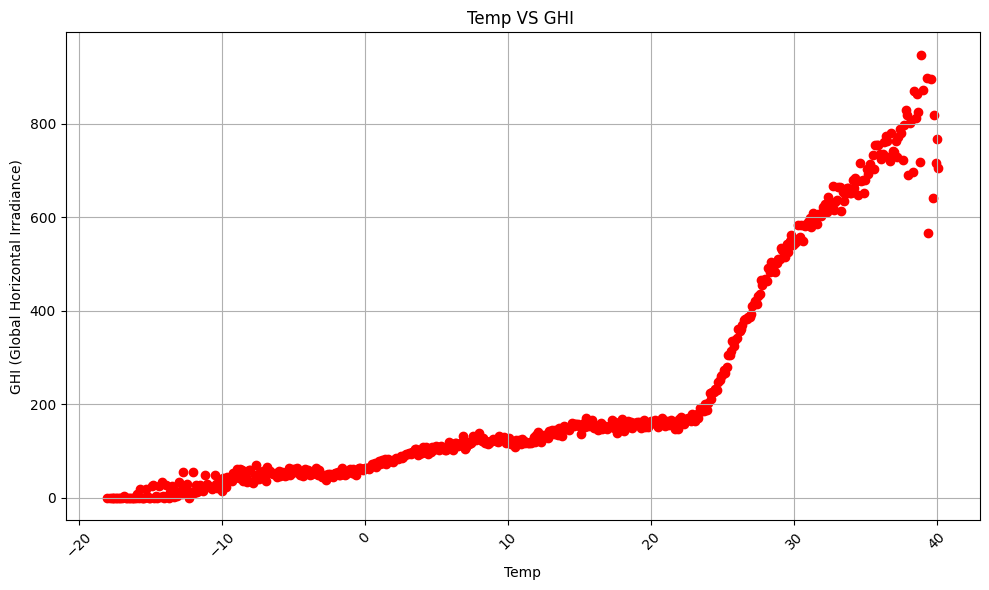

In [ ]:
 #Avg. GHI Generated per hour
plt.figure(figsize=(10, 6))
plt.scatter(temp_ghi_df.Temperature, temp_ghi_df.GHI, marker='o', color='r')
plt.title('Temp VS GHI ')
plt.xlabel('Temp')
plt.ylabel('GHI (Global Horizontal Irradiance)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data

,Day,Year,Month,Hour,Minute,Temperature,Dew Point,Wind Speed,Clearsky GHI,Cloud Type,Precipitable Water,Relative Humidity,Solar Zenith Angle,Pressure,GHI,Season
0,1,2011,1,0,0,1.4,0.9,1.4,0,0,1.9,96.18,113.77,1020,0,Winter
1,1,2011,1,0,30,1.3,0.9,1.4,0,0,1.8,96.87,119.50,1020,0,Winter
2,1,2011,1,1,0,1.2,0.9,1.4,0,0,1.8,97.53,125.28,1020,0,Winter
3,1,2011,1,1,30,1.2,0.9,1.4,0,0,1.9,97.53,131.08,1020,0,Winter
4,1,2011,1,2,0,1.1,0.9,1.4,0,1,1.9,98.39,136.86,1020,0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437995,31,2017,12,21,30,-7.9,-15.3,3.7,41,8,0.4,55.42,86.74,1026,24,Winter
437996,31,2017,12,22,0,-8.1,-15.3,3.5,0,8,0.4,56.35,91.96,1026,0,Winter
437997,31,2017,12,22,30,-8.3,-15.3,3.4,0,1,0.3,57.24,97.16,1026,0,Winter
437998,31,2017,12,23,0,-8.4,-15.0,3.3,0,1,0.3,59.17,102.55,1026,0,Winter


Training data shape: (350380, 24, 18)
Testing data shape: (87596, 24, 18)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 24, 50)              │          13,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,301 (137.89 KB)

 Trainable params: 35,301 (137.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 283s 26ms/step - loss: 31418.3008 - val_loss: 4818.6060
Epoch 2/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 282s 26ms/step - loss: 5258.7510 - val_loss: 4480.1895
Epoch 3/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 313s 25ms/step - loss: 4768.9507 - val_loss: 4049.3535
Epoch 4/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 332s 26ms/step - loss: 4510.6289 - val_loss: 3818.3501
Epoch 5/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 326s 26ms/step - loss: 4453.4287 - val_loss: 3834.1145
Epoch 6/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 283s 26ms/step - loss: 4301.6245 - val_loss: 3906.7537
Epoch 7/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 324s 26ms/step - loss: 4212.3882 - val_loss: 3805.4783
Epoch 8/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 285s 26ms/step - loss: 4141.9077 - val_loss: 3719.7710
Epoch 9/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 283s 26ms/step - loss: 4111.6050 - val_loss: 3744.0176
Epoch 10/20
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 324s 26ms/step - loss: 4052.7131 - val_loss: 3728.4849
Epoch 11

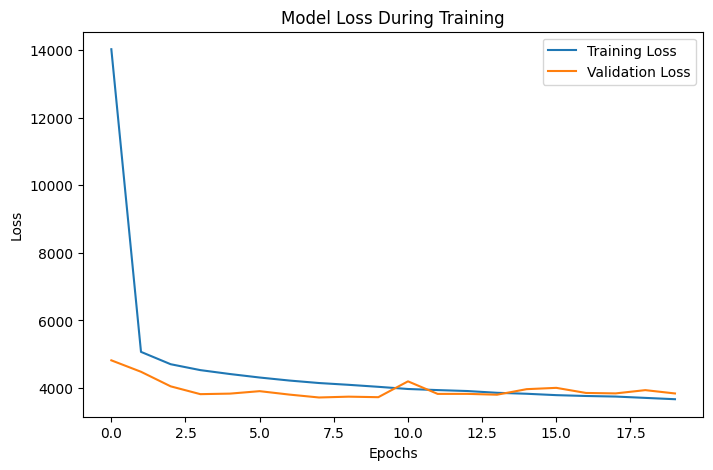

2738/2738 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step


In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

import numpy as np
# One-hot encode the season variable
season_encoder = OneHotEncoder()
season_encoded = season_encoder.fit_transform(data[['Season']])
season_encoded_df = pd.DataFrame(
    season_encoded.toarray(),
    index=data.index,
    columns=season_encoder.get_feature_names_out(['Season'])
)
data = pd.concat([data.drop(['Season'], axis=1), season_encoded_df], axis=1)

# Separate features and target
features = data.drop(columns=['GHI'])
target = data['GHI']

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Combine scaled features and target
scaled_data = np.concatenate([scaled_features, target.values.reshape(-1, 1)], axis=1)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :-1])  # All features except target
        y.append(data[i, -1])  # Target variable (GHI)
    return np.array(X), np.array(y)

sequence_length = 24
X, y = create_sequences(scaled_data, sequence_length)

# Split into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot training vs validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
y_pred = model.predict(X_test)

# Rescale predictions and actual values
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred_rescaled = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_pred), axis=1))[:, -1]


Root Mean Squared Error (RMSE): 61.95870069920304
Mean Absolute Error (MAE): 33.4878997366158


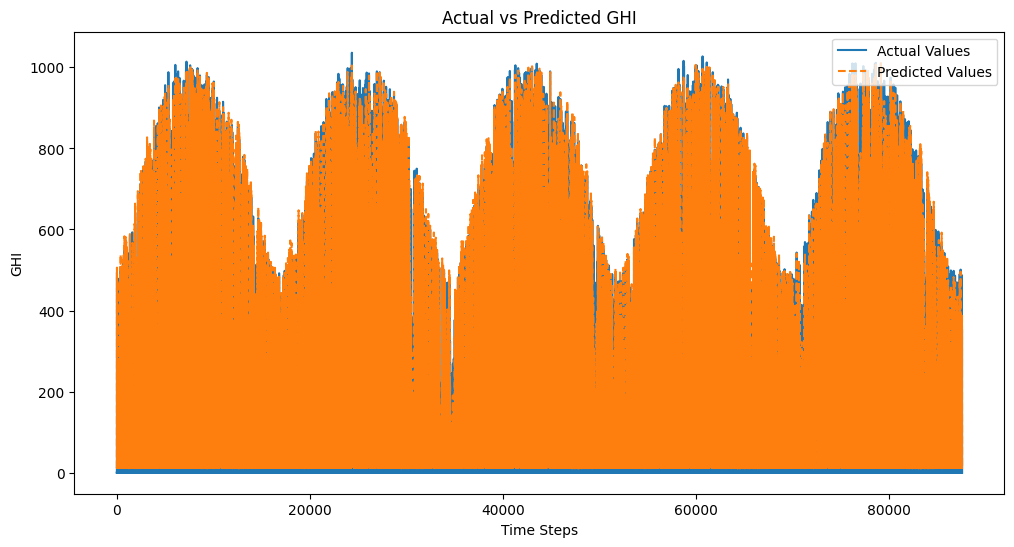

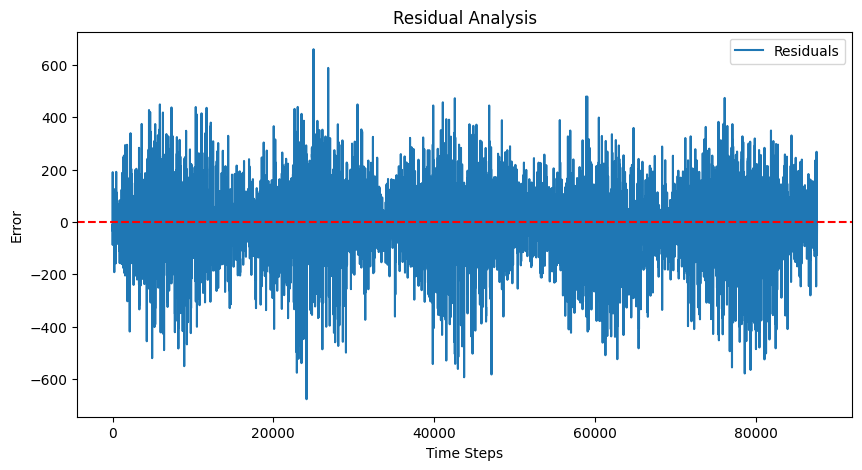

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Values')
plt.plot(y_pred_rescaled, label='Predicted Values', linestyle='dashed')
plt.title('Actual vs Predicted GHI')
plt.xlabel('Time Steps')
plt.ylabel('GHI')
plt.legend()
plt.show()

# Residual analysis
residuals = y_test_rescaled - y_pred_rescaled
plt.figure(figsize=(10, 5))
plt.plot(residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='dashed')
plt.title('Residual Analysis')
plt.xlabel('Time Steps')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the ANN model
ann_model = Sequential([
    Dense(128, input_dim=X_train.shape[1] * X_train.shape[2], activation='relu'),  # Flattened input
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for predicting GHI
])

# Compile the model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Train ANN model
ann_history = ann_model.fit(X_train.reshape(X_train.shape[0], -1), y_train,  # Reshape for ANN input
                            validation_data=(X_test.reshape(X_test.shape[0], -1), y_test),
                            epochs=20, batch_size=32)

# Make predictions on the test set
y_pred_ann = ann_model.predict(X_test.reshape(X_test.shape[0], -1))

# Calculate RMSE and MAE for ANN model
y_test_rescaled_ann = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred_rescaled_ann = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_pred_ann), axis=1))[:, -1]

# Calculate RMSE and MAE for ANN
rmse_ann = np.sqrt(mean_squared_error(y_test_rescaled_ann, y_pred_rescaled_ann))
mae_ann = mean_absolute_error(y_test_rescaled_ann, y_pred_rescaled_ann)

print("ANN Model - Root Mean Squared Error (RMSE):", rmse_ann)
print("ANN Model - Mean Absolute Error (MAE):", mae_ann)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA


arima_model = ARIMA(y_train, order=(5, 1, 0))
arima_result = arima_model.fit()


y_arima_pred = arima_result.forecast(steps=len(y_test))
rmse_arima = np.sqrt(mean_squared_error(y_test, y_arima_pred))
mae_arima = mean_absolute_error(y_test, y_arima_pred)
print(f"ARIMA RMSE: {rmse_arima}, MAE: {mae_arima}")


ARIMA RMSE: 311.2057871472999, MAE: 173.53115439061145


In [ ]:
from xgboost import XGBRegressor

# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Predict with XGBoost
y_xgb_pred = xgb_model.predict(X_test.reshape(X_test.shape[0], -1))
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_xgb_pred))
mae_xgb = mean_absolute_error(y_test, y_xgb_pred)
print(f"XGBoost RMSE: {rmse_xgb}, MAE: {mae_xgb}")


NameError: name 'X_train' is not defined

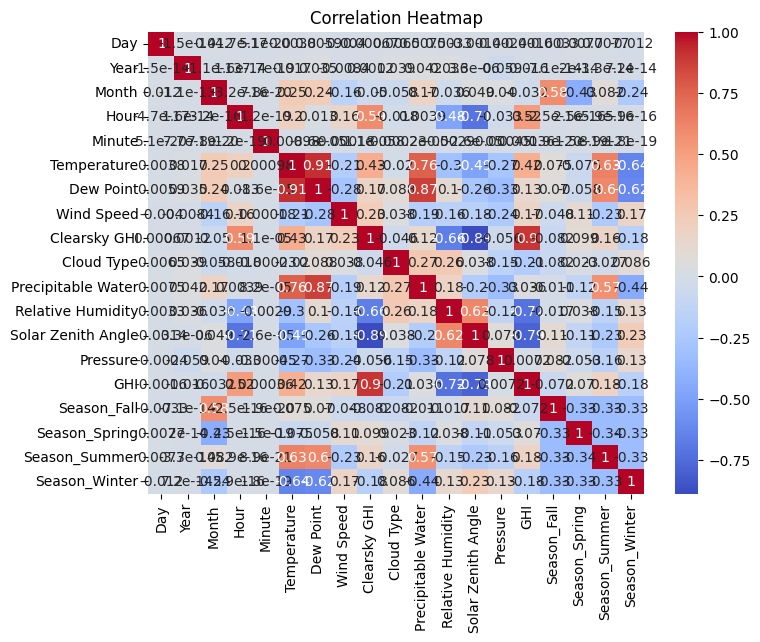

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


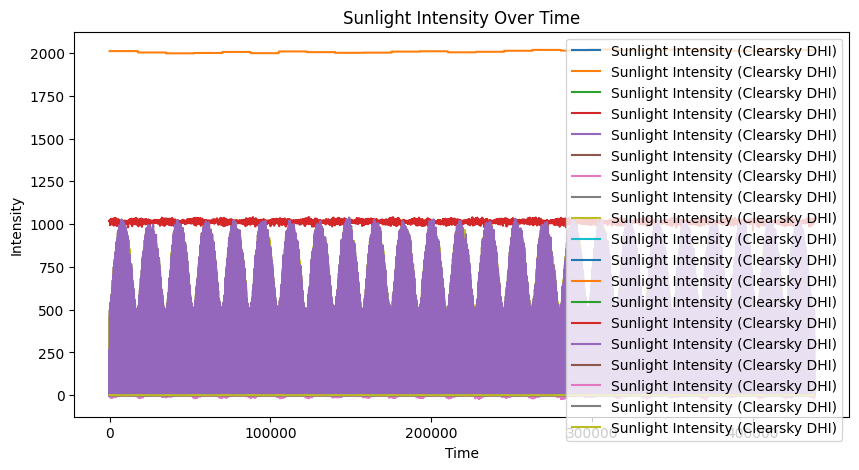

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 102s 9ms/step - loss: 0.0029
Epoch 2/50
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 151s 10ms/step - loss: 6.6650e-04
Epoch 3/50
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 140s 10ms/step - loss: 6.9386e-04
Epoch 4/50
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 131s 9ms/step - loss: 7.2045e-04
Epoch 5/50
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 88s 8ms/step - loss: 7.0638e-04
Epoch 6/50
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 157s 9ms/step - loss: 6.7406e-04
Epoch 7/50
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 141s 9ms/step - loss: 7.2844e-04
Epoch 8/50
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 122s 8ms/step - loss: 7.3972e-04
Epoch 9/50
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 145s 8ms/step - loss: 6.5459e-04
Epoch 10/50
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 138s 8ms/step - loss: 6.4129e-04
Epoch 11/50
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 159s 9ms/step - loss: 7.8376e-04
Epoch 12/50
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 134s 8ms/step - loss: 6.1659e-04
Epoch 13/50
10950/10950 ━━━━━━━━━━━━━━━━━━━━ 115s 10ms/step - loss: 6.7628e-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor



# CNN Model for Time-Series
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
cnn_model.compile(optimizer='adam', loss='mean_squared_error')
cnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

cnn_predictions = cnn_model.predict(X_test)
cnn_predictions = scaler.inverse_transform(cnn_predictions)

# ARIMA Model
arima_model = ARIMA(data['Clearsky DHI'], order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# ARIMA Predictions
arima_forecast = arima_model_fit.forecast(steps=len(test))
arima_forecast = scaler.inverse_transform(arima_forecast.reshape(-1, 1))

# Gradient Boosting Model
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train.reshape(X_train.shape[0], look_back), y_train)
gbm_predictions = gbm_model.predict(X_test.reshape(X_test.shape[0], look_back))
gbm_predictions = scaler.inverse_transform(gbm_predictions.reshape(-1, 1))

# XGBoost Model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train.reshape(X_train.shape[0], look_back), y_train)
xgb_predictions = xgb_model.predict(X_test.reshape(X_test.shape[0], look_back))
xgb_predictions = scaler.inverse_transform(xgb_predictions.reshape(-1, 1))

# Evaluate Models
def evaluate_model(predictions, actual, model_name):
    mse = mean_squared_error(actual, predictions)
    mae = mean_absolute_error(actual, predictions)
    print(f"{model_name} - MSE: {mse:.4f}, MAE: {mae:.4f}")
    return mse, mae

print("Model Evaluations:")
evaluate_model(lstm_predictions, y_test_actual[0], "LSTM")
evaluate_model(cnn_predictions, y_test_actual[0], "CNN")
evaluate_model(arima_forecast, data[-len(test):].values.flatten(), "ARIMA")
evaluate_model(gbm_predictions, y_test_actual[0], "Gradient Boosting")
evaluate_model(xgb_predictions, y_test_actual[0], "XGBoost")

# Residual Analysis
residuals = y_test_actual[0] - lstm_predictions.flatten()
plt.figure(figsize=(10, 5))
plt.plot(residuals, label='Residuals')
plt.title('Residual Analysis')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.show()

# Final Plot for Comparison
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual[0], label='Actual')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.plot(cnn_predictions, label='CNN Predictions')
plt.plot(arima_forecast, label='ARIMA Predictions', linestyle='dashed')
plt.plot(gbm_predictions, label='Gradient Boosting Predictions', linestyle='dotted')
plt.plot(xgb_predictions, label='XGBoost Predictions', linestyle='dashdot')
plt.title('Comparison of Predictions')
plt.xlabel('Time')
plt.ylabel('Sunlight Intensity')
plt.legend()
plt.show()


## TRIED SARIMA

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

sarima_model = SARIMAX(
    y_train,
    order=(2, 1, 1),  
    seasonal_order=(1, 1, 0, 4),  # Seasonal period = 4
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_result = sarima_model.fit(disp=False)

y_sarima_pred = sarima_result.forecast(steps=len(y_test))
rmse_sarima = np.sqrt(mean_squared_error(y_test, y_sarima_pred))
mae_sarima = mean_absolute_error(y_test, y_sarima_pred)
print(f"SARIMA RMSE: {rmse_sarima}, MAE: {mae_sarima}")